<a href="https://colab.research.google.com/github/karankumarsharma314-lab/python-projects-/blob/main/Netflix_vs_Tv_show(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# upload file
df = pd.read_csv("netflix_titles.csv")

In [4]:
# Check first 5 Row
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Check last 5 Row
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
# Check the Shape of Dataset
df.shape

(8807, 12)

In [7]:
# Check Column name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# Check datatypes of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
# Check Statistical Summary
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [16]:
# Check Missing Values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


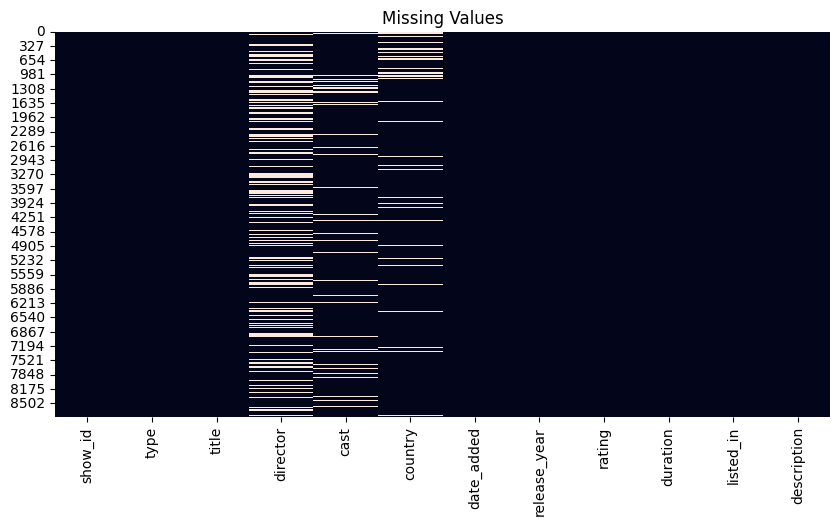

In [18]:
# Visualizing Missing Value
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values")
plt.show()

In [19]:
# Data Cleaning (Handling Missing Values)
df['director'] = df['director'].fillna("Not Available")
df['cast'] = df['cast'].fillna("Not Available")
df['country'] = df['country'].fillna("Not Available")
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['date_added'] = df['date_added'].fillna("Not Available")

In [20]:
# Check Duplicate Records
df.duplicated().sum()

np.int64(0)

In [21]:
# Data Type Conversion
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [22]:
# Distribution of Content Type
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


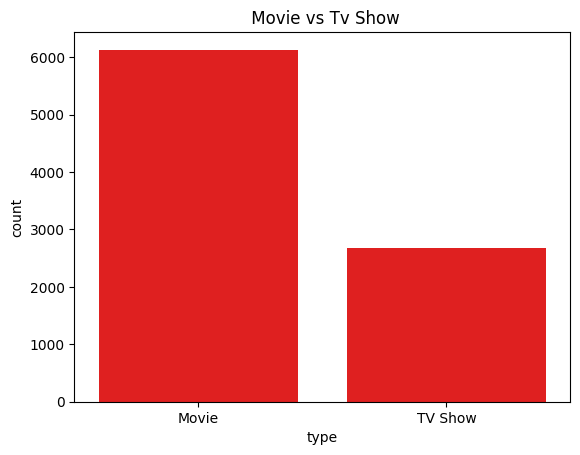

In [25]:
sns.countplot(x = 'type' , data = df ,color= 'red')
plt.title(" Movie vs Tv Show")
plt.show()

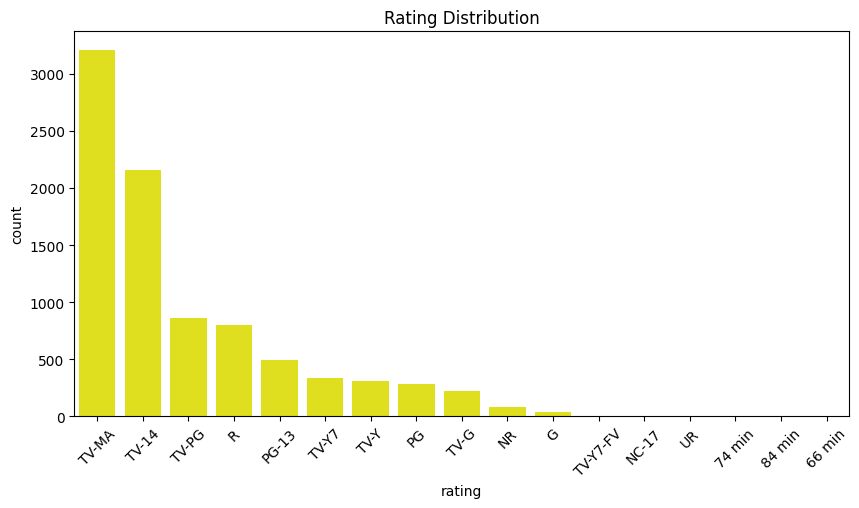

In [27]:
# Check Rating by  Distribution
plt.figure(figsize=(10,5))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index , color='yellow')
plt.xticks(rotation=45)
plt.title("Rating Distribution")
plt.show()

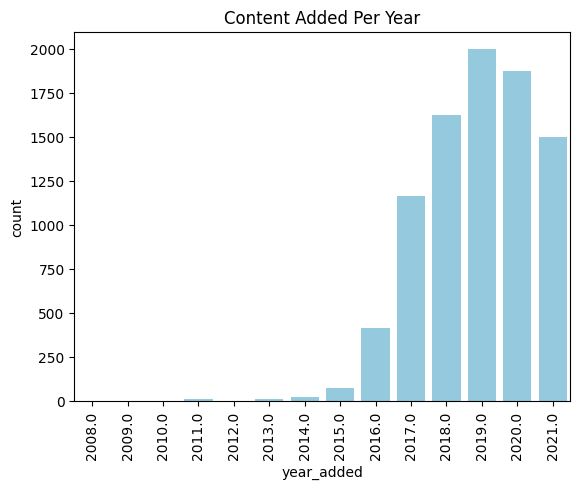

In [28]:
# Check Content Added per Year
df['year_added'] = df['date_added'].dt.year
sns.countplot(x='year_added', data=df, color= 'skyblue')
plt.xticks(rotation=90)
plt.title("Content Added Per Year")
plt.show()

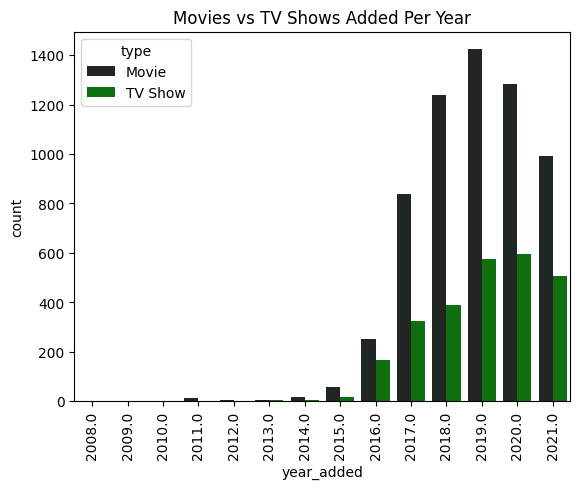

In [32]:
# Check Movies vs TV Shows by Year
sns.countplot(x='year_added', hue='type', data=df, color='green')
plt.xticks(rotation=90)
plt.title("Movies vs TV Shows Added Per Year")
plt.show()

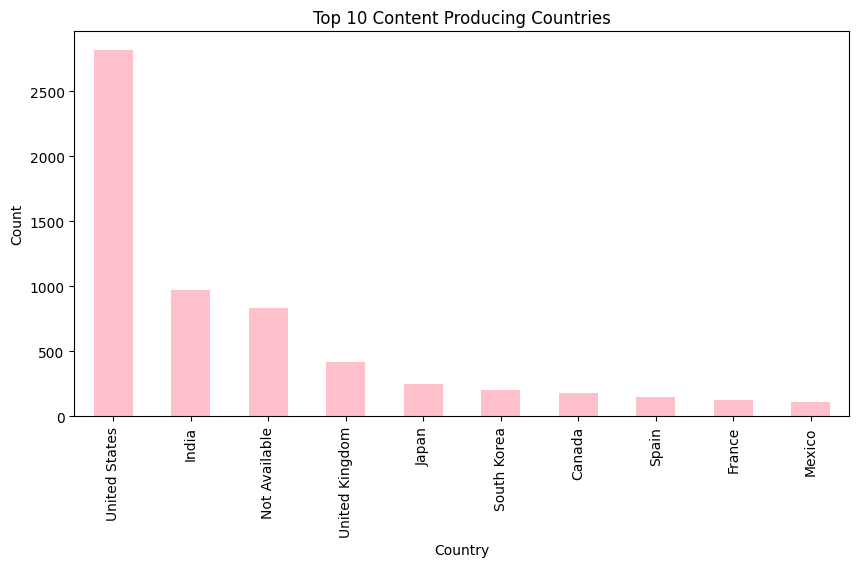

In [33]:
# Check Country-wise Content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar',color = 'pink')
plt.title("Top 10 Content Producing Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

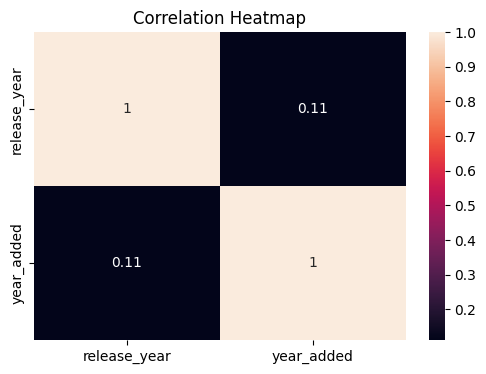

In [34]:
# Correlation Analysis (Numerical Data)
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [43]:
print("""                                ====== SUMMARY ======

Performed end-to-end exploratory data analysis (EDA) on Netflix content dataset using Python.

Conducted data inspection to understand dataset structure, dimensions, data types, and statistical distributions.

Identified and handled missing values using appropriate imputation strategies, including mode and placeholder values.

Visualized missing data patterns using heatmaps to ensure data quality and completeness.

Converted date features into datetime format and engineered new features such as content release year.

Analyzed content distribution across Movies and TV Shows using count plots.

Examined rating distribution and content trends over time to identify platform growth patterns.

Performed country-wise analysis to identify top content-producing regions.

Created multiple business-focused visualizations using Matplotlib and Seaborn.

Conducted correlation analysis on numerical variables to understand feature relationships.
""")


                                ====== SUMMARY ======

Performed end-to-end exploratory data analysis (EDA) on Netflix content dataset using Python.

Conducted data inspection to understand dataset structure, dimensions, data types, and statistical distributions.

Identified and handled missing values using appropriate imputation strategies, including mode and placeholder values.

Visualized missing data patterns using heatmaps to ensure data quality and completeness.

Converted date features into datetime format and engineered new features such as content release year.

Analyzed content distribution across Movies and TV Shows using count plots.

Examined rating distribution and content trends over time to identify platform growth patterns.

Performed country-wise analysis to identify top content-producing regions.

Created multiple business-focused visualizations using Matplotlib and Seaborn.

Conducted correlation analysis on numerical variables to understand feature relationships.

